# Practice 14

# Image

### Exercise 1

### 2

In [15]:
import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np
import os

In [16]:
dir_path = 'dataset\\images'
content = os.scandir(dir_path)
dic = {}
count=0
for item in content:
    if item.is_file():
        count+=1
        dic[count]=item.path
        print('FILE: ' + item.path)
    else:
        print('DIR: ' + item.path)


FILE: dataset\images\a.jpg
FILE: dataset\images\b.jpg
FILE: dataset\images\c.jpg
FILE: dataset\images\d.png
FILE: dataset\images\e.jpg


In [17]:
dic

{1: 'dataset\\images\\a.jpg',
 2: 'dataset\\images\\b.jpg',
 3: 'dataset\\images\\c.jpg',
 4: 'dataset\\images\\d.png',
 5: 'dataset\\images\\e.jpg'}

In [18]:
def col_gray_bin (x):
    if len(x)==3:
        print('The image is Color')
    elif len(x)==2:
        print('The image is gray')
    else:
        print('The image is binary')

In [19]:
# example
img1= cv.imread(r'dataset/images/a.jpg',cv.IMREAD_UNCHANGED)
print(img1)
print(f'shape of image a is {img1.shape}')
col_gray_bin(img1.shape)

[[  0   1   2 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   3 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
shape of image a is (320, 480)
The image is gray


In [20]:
# First Solution
for i in range(len(dic)):
    print(dic[i+1])
    img= cv.imread(dic[i+1],cv.IMREAD_UNCHANGED)
    print(f'shape of image is {img.shape}')
    col_gray_bin(img.shape) 

dataset\images\a.jpg
shape of image is (320, 480)
The image is gray
dataset\images\b.jpg
shape of image is (320, 480, 3)
The image is Color
dataset\images\c.jpg
shape of image is (512, 512)
The image is gray
dataset\images\d.png
shape of image is (316, 314)
The image is gray
dataset\images\e.jpg
shape of image is (600, 600)
The image is gray


In [21]:
# Second Solution

dir_path = 'dataset\images'
content = os.scandir(dir_path)
for item in content:
    if item.is_file():
        print('FILE: ' + item.path)
        img= cv.imread(item.path,cv.IMREAD_UNCHANGED)
        print(f'shape of image is {img.shape}')
        col_gray_bin(img.shape)
    else:
        print('DIR: ' + item.path)


FILE: dataset\images\a.jpg
shape of image is (320, 480)
The image is gray
FILE: dataset\images\b.jpg
shape of image is (320, 480, 3)
The image is Color
FILE: dataset\images\c.jpg
shape of image is (512, 512)
The image is gray
FILE: dataset\images\d.png
shape of image is (316, 314)
The image is gray
FILE: dataset\images\e.jpg
shape of image is (600, 600)
The image is gray


## Show images

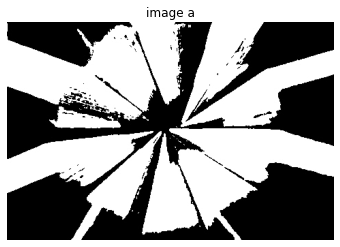

In [22]:
a= cv.imread(r'dataset/images/a.jpg',cv.IMREAD_UNCHANGED)

plt.imshow(a,cmap='gray')
plt.axis('off')
plt.title('image a')
plt.show()

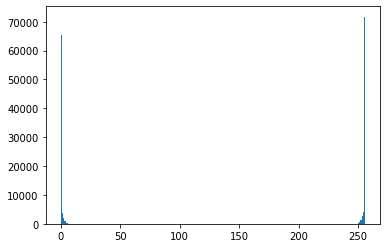

In [23]:
plt.hist(a.ravel(),256,[0,256])
plt.show()

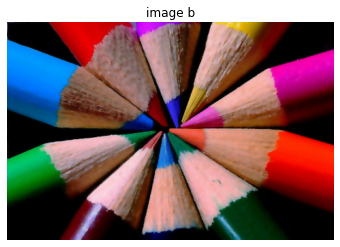

In [24]:
b= cv.imread(r'dataset/images/b.jpg',cv.IMREAD_UNCHANGED)

b_RGB = cv.cvtColor(b,cv.COLOR_RGB2BGR)
plt.imshow(b_RGB)
plt.axis('off')
plt.title('image b')
plt.show()

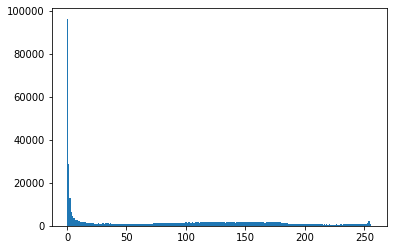

In [39]:
plt.hist(b_RGB.ravel(),256,[0,256])
plt.show()

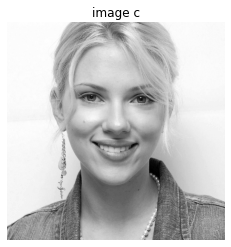

In [25]:
c= cv.imread(r'dataset/images/c.jpg',cv.IMREAD_UNCHANGED)

plt.imshow(c,cmap='gray')
plt.axis('off')
plt.title('image c')
plt.show()

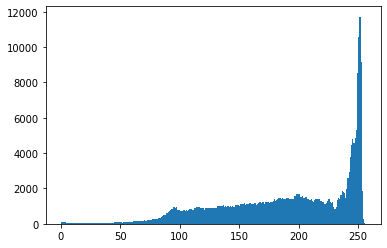

In [40]:
plt.hist(c.ravel(),256,[0,256])
plt.show()

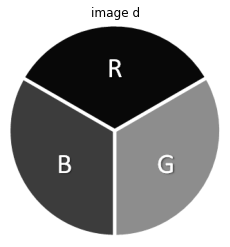

In [26]:
d= cv.imread(r'dataset/images/d.png',cv.IMREAD_UNCHANGED)

plt.imshow(d,cmap='gray')
plt.axis('off')
plt.title('image d')
plt.show()

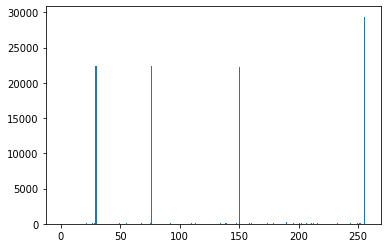

In [41]:
plt.hist(d.ravel(),256,[0,256])
plt.show()

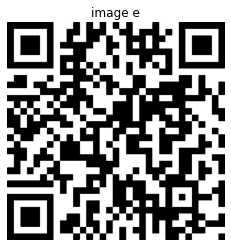

In [27]:
e= cv.imread(r'dataset/images/e.jpg',cv.IMREAD_UNCHANGED)

plt.imshow(e,cmap='gray')
plt.axis('off')
plt.title('image e')
plt.show()


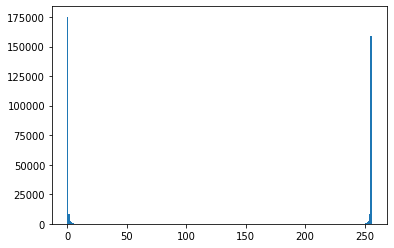

In [43]:
plt.hist(e.ravel(),256,[0,256])
plt.show()

## Convert gray to binary and color to gray 

## contrast 

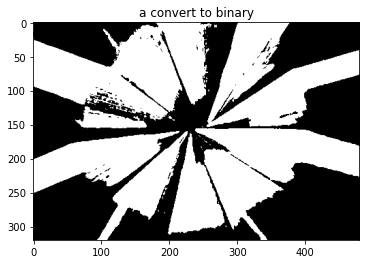

In [28]:
# a is gray image so convert it to the binary image
(thesh, a_convert) = cv.threshold(a, 128, 255, cv.THRESH_BINARY)
plt.imshow(a_convert, cmap='gray')
plt.title('a convert to binary')
plt.show()

In [29]:
## create function to get contrast

con = lambda x : 255-x
contrast = np.vectorize(con)

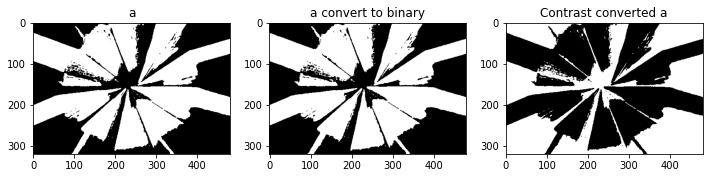

In [30]:
# comparing a with contrast a
a_conttrast = contrast(a_convert)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title('a')
plt.subplot(1,3,2)
plt.imshow(a_convert, cmap='gray')
plt.title('a convert to binary')
plt.subplot(1,3,3)
plt.imshow(a_conttrast,cmap= 'gray')
plt.title('Contrast converted a')
plt.show()

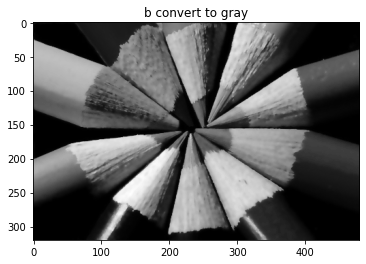

In [31]:
b_gray = cv.cvtColor(b,cv.COLOR_RGB2GRAY)
plt.imshow(b_gray,cmap='gray')
plt.title('b convert to gray')
plt.show()

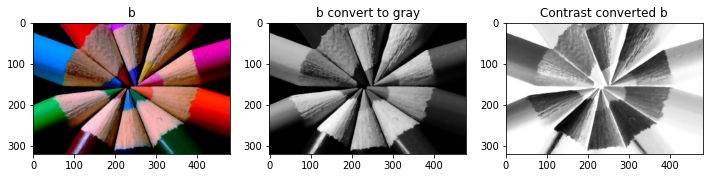

In [32]:
b_gray_conttrast = contrast(b_gray)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(b_RGB, cmap='gray')
plt.title('b')
plt.subplot(1,3,2)
plt.imshow(b_gray, cmap='gray')
plt.title('b convert to gray')
plt.subplot(1,3,3)
plt.imshow(b_gray_conttrast,cmap= 'gray')
plt.title('Contrast converted b')
plt.show()

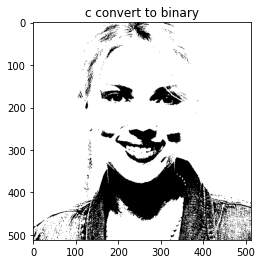

In [33]:
(thesh,c_convert) = cv.threshold(c,128,255,cv.THRESH_BINARY)
plt.imshow(c_convert,cmap='gray')
plt.title('c convert to binary')
plt.show()

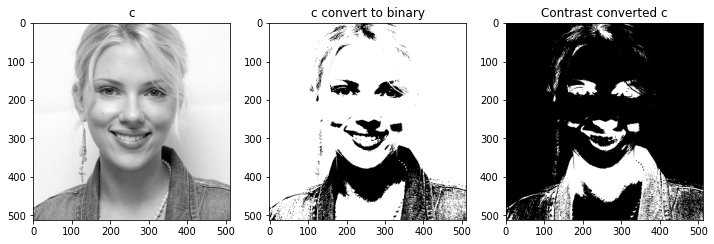

In [34]:
# comparing c with contrast c
c_conttrast = contrast(c_convert)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(c, cmap='gray')
plt.title('c')
plt.subplot(1,3,2)
plt.imshow(c_convert, cmap='gray')
plt.title('c convert to binary')
plt.subplot(1,3,3)
plt.imshow(c_conttrast,cmap= 'gray')
plt.title('Contrast converted c')
plt.show()

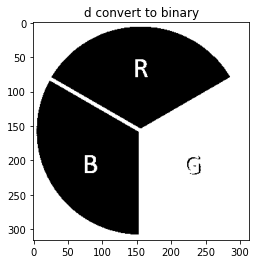

In [35]:
(thesh,d_convert) = cv.threshold(d,128,255,cv.THRESH_BINARY)
plt.imshow(d_convert,cmap='gray')
plt.title('d convert to binary')
plt.show()

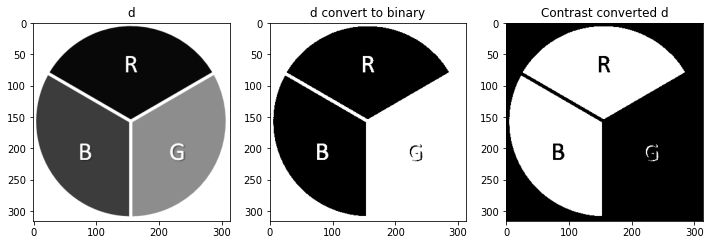

In [36]:
# comparing d with contrast d
d_conttrast = contrast(d_convert)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(d, cmap='gray')
plt.title('d')
plt.subplot(1,3,2)
plt.imshow(d_convert, cmap='gray')
plt.title('d convert to binary')
plt.subplot(1,3,3)
plt.imshow(d_conttrast,cmap= 'gray')
plt.title('Contrast converted d')
plt.show()

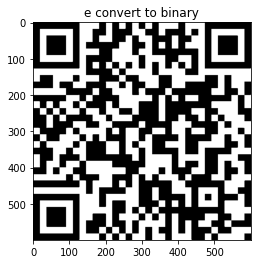

In [37]:
(thesh,e_convert) = cv.threshold(e,128,255,cv.THRESH_BINARY)
plt.imshow(e_convert,cmap='gray')
plt.title('e convert to binary')
plt.show()

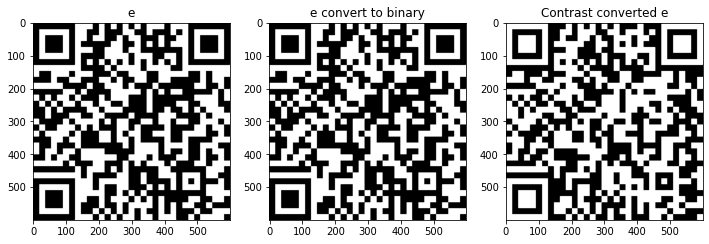

In [38]:
# comparing e with contrast e
e_conttrast = contrast(e_convert)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(e, cmap='gray')
plt.title('e')
plt.subplot(1,3,2)
plt.imshow(e_convert, cmap='gray')
plt.title('e convert to binary')
plt.subplot(1,3,3)
plt.imshow(e_conttrast,cmap= 'gray')
plt.title('Contrast converted e')
plt.show()